In [1]:
import pandas as pd
import zipfile36 as zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kaggle

In [3]:
!kaggle datasets download -d drahulsingh/sachin-tendulkar-all-international-centuries

sachin-tendulkar-all-international-centuries.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
zipfile_name = "sachin-tendulkar-all-international-centuries.zip"



In [5]:
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [6]:
sachin_tendulkar_df = pd.read_csv("Sachin-Tendulkar-All-International-Cricket-Centuries.csv", parse_dates=["Date"])

In [7]:
sachin_tendulkar_df

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,119*,England,6,4,"Old Trafford, Manchester",Away,1990-08-09,Drawn
1,2,148*,Australia,6,2,"Sydney Cricket Ground, Sydney",Away,1992-01-02,Drawn
2,3,114,Australia,4,2,"WACA Ground, Perth",Away,1992-02-01,Lost
3,4,111,South Africa,4,2,"Wanderers Stadium, Johannesburg",Away,1992-11-26,Drawn
4,5,165,England,4,1,"M. A. Chidambaram Stadium, Chennai",Home,1993-02-11,Won
...,...,...,...,...,...,...,...,...,...
95,96,111*,South Africa,5,3,"SuperSport Park, Centurion",Away,2010-12-16,Lost
96,97,146,South Africa,4,2,"Newlands Cricket Ground, Cape Town",Away,2011-01-02,Drawn
97,98,120,England,2,1,"M. Chinnaswamy Stadium, Bangalore",Home,2011-02-27,Tied
98,99,111,South Africa,2,1,"VCA Stadium, Nagpur",Home,2011-03-12,Lost


In [8]:
sachin_tendulkar_df['Score'] = sachin_tendulkar_df['Score'].str.replace(r'[^\w\s]', '')
sachin_tendulkar_df['Score']=sachin_tendulkar_df['Score'].astype(str).astype(int)

C:\Users\Rahul Saxena\AppData\Local\Temp\ipykernel_26236\2705097345.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sachin_tendulkar_df['Score'] = sachin_tendulkar_df['Score'].str.replace(r'[^\w\s]', '')


In [9]:
sachin_tendulkar_df = sachin_tendulkar_df.drop(columns='No.')

In [10]:
sachin_tendulkar_df

,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,119,England,6,4,"Old Trafford, Manchester",Away,1990-08-09,Drawn
1,148,Australia,6,2,"Sydney Cricket Ground, Sydney",Away,1992-01-02,Drawn
2,114,Australia,4,2,"WACA Ground, Perth",Away,1992-02-01,Lost
3,111,South Africa,4,2,"Wanderers Stadium, Johannesburg",Away,1992-11-26,Drawn
4,165,England,4,1,"M. A. Chidambaram Stadium, Chennai",Home,1993-02-11,Won
...,...,...,...,...,...,...,...,...
95,111,South Africa,5,3,"SuperSport Park, Centurion",Away,2010-12-16,Lost
96,146,South Africa,4,2,"Newlands Cricket Ground, Cape Town",Away,2011-01-02,Drawn
97,120,England,2,1,"M. Chinnaswamy Stadium, Bangalore",Home,2011-02-27,Tied
98,111,South Africa,2,1,"VCA Stadium, Nagpur",Home,2011-03-12,Lost


In [11]:
sachin_tendulkar_df.describe()

,Score,Position,Innings
count,100.00000,100.000000,100.000000
mean,135.57000,3.140000,1.630000
std,33.33038,1.206213,0.786952
min,100.00000,1.000000,1.000000
25%,111.00000,2.000000,1.000000
50%,124.00000,4.000000,1.000000
75%,149.00000,4.000000,2.000000
max,248.00000,6.000000,4.000000


In [12]:
sachin_top_10= sachin_tendulkar_df.sort_values("Score", ascending=False)[:10]

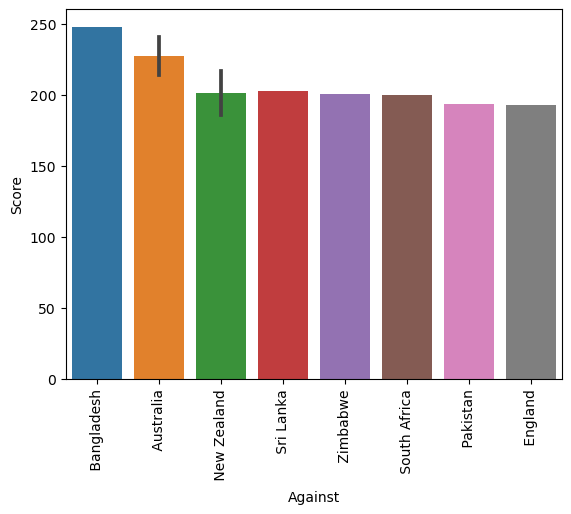

In [13]:
sns.barplot(data=sachin_top_10, x="Against", y="Score")
plt.xticks(rotation=90)
plt.show()

In [14]:
#Finding most centuries against
most_centuries = (sachin_tendulkar_df
                  .groupby("Against")["Against"]
                  .agg(["count"])
                  .reset_index()
                  .sort_values("count", ascending=False)[:10]
                 )

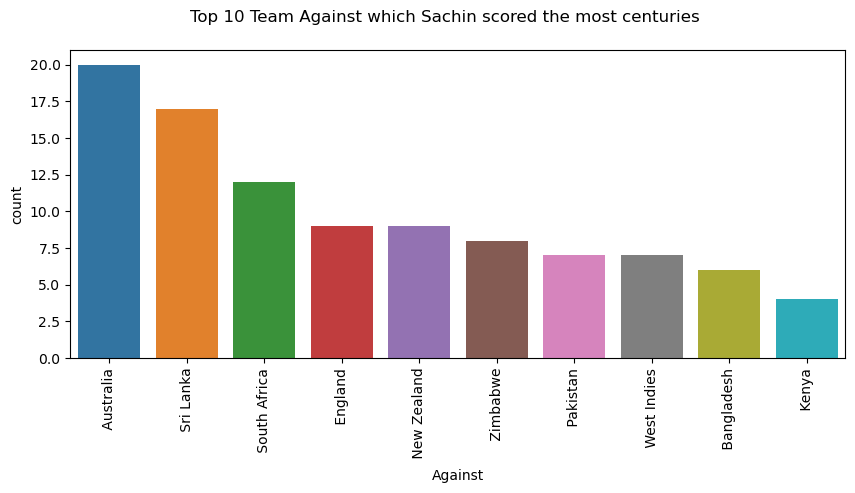

In [15]:
fig, ax  = plt.subplots(figsize=(10, 4))

fig.suptitle("Top 10 Team Against which Sachin scored the most centuries")
sns.barplot(data=most_centuries,
           x="Against",
           y="count")

plt.xticks(rotation=90)
plt.show();

In [16]:
grounds_df = sachin_tendulkar_df["Ground"].value_counts()


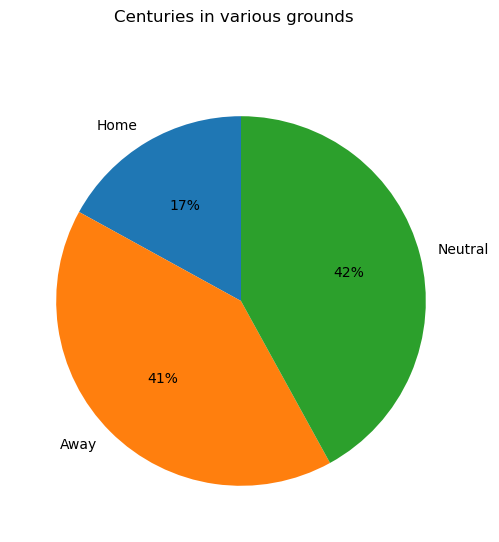

In [17]:
fig, ax= plt.subplots(figsize=(6, 6))

fig.suptitle("Centuries in various grounds")
plt.pie(grounds_df.sort_values(),
       startangle=90,
       autopct="%.0f%%",
       labels=grounds_df.index
       )

plt.show()

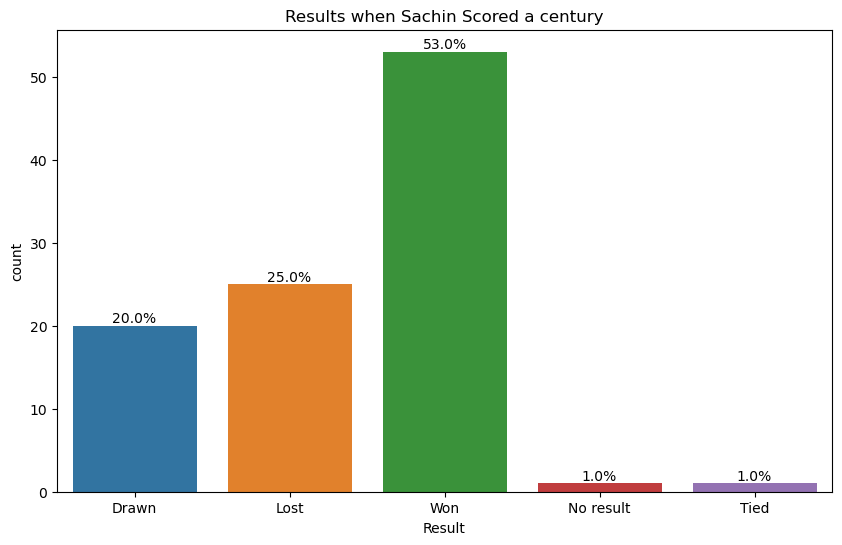

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Results when Sachin Scored a century")

sns.countplot(data=sachin_tendulkar_df,
              x="Result"
             )

# Calculate percentage for each category
total = len(sachin_tendulkar_df["Result"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
